In [35]:
# state representation
# [0,0,0,0,0,0] -> 6 glasses which are empty

initialState = [0,0,0,0,0,0]
finalState = [1,1,1,1,1,1]

In [36]:
# GAME FUNCTIONS
import random 
# dice roll from 1 to 6
roll_dice = lambda: random.randint(1,6)

In [37]:
# chupitos game 
def chupitos(state):
    # base case
    if state == finalState:
        print("You win!")
        return
    # recursive case
    else:
        print("Current state: ", state)
        # we roll the dice and land on an empty glass we fill it
        # if we land on a glass with liquid
    # we roll the dice and land on an empty glass we fill it
    # if we land on a glass with liquid we drink it 
        # we roll the dice
        dice = roll_dice()
        print("Dice Roll: ", dice)
        # we check if the glass is empty
        if state[dice-1] == 0:
            # we fill the glass
            state[dice-1] = 1
        else:
            # we drink the glass
            state[dice-1] = 0
        chupitos(state) 
        



In [38]:
# MAIN
chupitos(initialState)

Current state:  [0, 0, 0, 0, 0, 0]
Dice Roll:  6
Current state:  [0, 0, 0, 0, 0, 1]
Dice Roll:  6
Current state:  [0, 0, 0, 0, 0, 0]
Dice Roll:  1
Current state:  [1, 0, 0, 0, 0, 0]
Dice Roll:  3
Current state:  [1, 0, 1, 0, 0, 0]
Dice Roll:  5
Current state:  [1, 0, 1, 0, 1, 0]
Dice Roll:  2
Current state:  [1, 1, 1, 0, 1, 0]
Dice Roll:  2
Current state:  [1, 0, 1, 0, 1, 0]
Dice Roll:  3
Current state:  [1, 0, 0, 0, 1, 0]
Dice Roll:  5
Current state:  [1, 0, 0, 0, 0, 0]
Dice Roll:  3
Current state:  [1, 0, 1, 0, 0, 0]
Dice Roll:  1
Current state:  [0, 0, 1, 0, 0, 0]
Dice Roll:  4
Current state:  [0, 0, 1, 1, 0, 0]
Dice Roll:  3
Current state:  [0, 0, 0, 1, 0, 0]
Dice Roll:  6
Current state:  [0, 0, 0, 1, 0, 1]
Dice Roll:  5
Current state:  [0, 0, 0, 1, 1, 1]
Dice Roll:  6
Current state:  [0, 0, 0, 1, 1, 0]
Dice Roll:  3
Current state:  [0, 0, 1, 1, 1, 0]
Dice Roll:  2
Current state:  [0, 1, 1, 1, 1, 0]
Dice Roll:  5
Current state:  [0, 1, 1, 1, 0, 0]
Dice Roll:  4
Current state:  [0, 

In [ ]:
import numpy as np
import markovchains as mc
from markovchains import MarkovChain

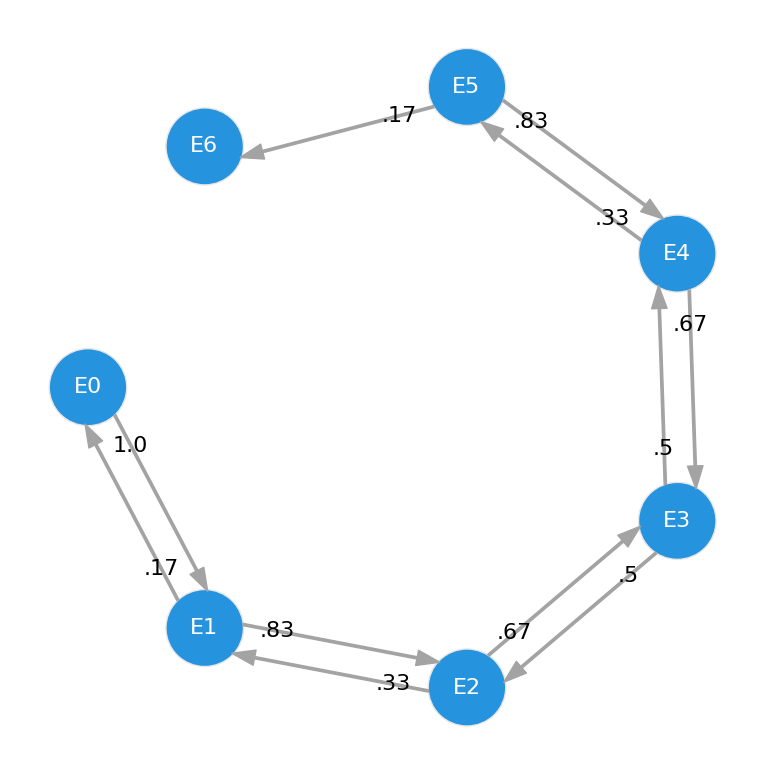

In [ ]:

# Transition matrix
M = 1/6*np.array([
    [0, 6, 0, 0, 0, 0,0], 
    [1, 0, 5, 0, 0, 0,0], 
    [0, 2, 0, 4, 0, 0,0], 
    [0, 0, 3, 0, 3, 0,0], 
    [0, 0, 0, 4, 0, 2,0], 
    [0, 0, 0, 0, 5, 0,1 ], 
    [0, 0, 0, 0, 0, 0,0 ]
])


mc = MarkovChain(M, ['E0', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6'])
mc.draw()


In [ ]:
# calculating the episode length for each state
# we will use the transition matrix to calculate the episode length
I = np.identity(7)
QE = np.linalg.inv(I - M)
Y = np.ones(7); Y[6]=0
E = np.matmul(QE,Y)
E



array([83.2, 82.2, 80.8, 78.6, 74.4, 63. ,  0. ])

In [ ]:
# with reward
I = np.identity(7)
QE = np.linalg.inv(I - M)
R = np.matmul(QE,np.array([0,1,2,3,4,5,6]))
R

array([237.6, 237.6, 236.4, 232.8, 223.2, 192. ,   6. ])

In [31]:
# brute force
import numpy as np
import random
import numpy
# GAME FUNCTIONS
import random 
# dice roll from 1 to 6
roll_dice = lambda: random.randint(1,6)

def run_tests(runs=250000):
    episodes = []
    rewards = []
    shots = []
    for r in range(runs):
        initialState = [0,0,0,0,0,0]
        finalState = [1,1,1,1,1,1]
        # all empty
        k = 0
        episode = 0
        reward = 0
        shot = 0
        # BASIC GAME
        state = initialState
        while True:
            dice = roll_dice() # Return a number between A and B (both included)
            episode += 1
            reward += k
            if state[dice-1] == 0:
                # we fill the glass
                state[dice-1] = 1
                k+=1
                # we check if the glass is empty
                if state == finalState:
                    break
            else:
            # we drink the glass
                state[dice-1] = 0
                shot += 1
                
            
        episodes.append(episode)
        rewards.append(reward)
        shots.append(shot)
        # print(episode,reward)
    return episodes,rewards,shots

episodes, rewards, shots = run_tests()
print('FINISHED',np.array(episodes).mean(),np.array(rewards).mean(), np.array(shots).mean())

FINISHED 83.236248 3313.662428 38.618124


EXPECTED THROWS: 84
EXPECTED SHOTS: 39